# Форматы данных (1)

Материалы:
* Макрушин С.В. "Лекция 4: Форматы данных"
* https://docs.python.org/3/library/json.html
* https://docs.python.org/3/library/pickle.html
* https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/bs4ru.html
* Уэс Маккини. Python и анализ данных

## Задачи для совместного разбора

<span style='color:green'>1. Вывести все адреса электронной почты, содержащиеся в адресной книге `addres-book.json`</span>

In [19]:
import json # библиотека для работы с JSON


with open('data\\addres-book.json', 'r', encoding='utf-8') as file: # открываем файл на чтение
    data_loaded = json.load(file)
    print(data_loaded, end='\n\n')
    for dct in data_loaded:
        print(dct['email'])

[{'name': 'Faina Lee', 'email': 'faina@mail.ru', 'birthday': '22.08.1994', 'phones': [{'phone': '232-19-55'}, {'phone': '+7 (916) 232-19-55'}]}, {'name': 'Robert Lee', 'email': 'robert@mail.ru', 'birthday': '22.08.1994', 'phones': [{'phone': '111-19-55'}, {'phone': '+7 (916) 445-19-55'}]}]

faina@mail.ru
robert@mail.ru


ИЛИ

In [17]:
import pandas as pd


# файл JSON в DataFrame
df = pd.read_json('data\\addres-book.json')
print(df, end='\n\n')

# извлечение emails
emails = df['email']
for email in emails:
    print(email)

         name           email    birthday  \
0   Faina Lee   faina@mail.ru  22.08.1994   
1  Robert Lee  robert@mail.ru  22.08.1994   

                                              phones  
0  [{'phone': '232-19-55'}, {'phone': '+7 (916) 2...  
1  [{'phone': '111-19-55'}, {'phone': '+7 (916) 4...  

faina@mail.ru
robert@mail.ru


<span style='color:green'>2. Вывести телефоны, содержащиеся в адресной книге `addres-book.json`</span>

In [20]:
# работа с библиотекой json (из задания 1)
for dct in data_loaded:
    for phone in dct['phones']:
        print(phone['phone'])

232-19-55
+7 (916) 232-19-55
111-19-55
+7 (916) 445-19-55


ИЛИ

In [27]:
# работа с библиотекой pandas (из задания 1)
phones = df['phones']
for users_phones in phones:
    # для каждого пользователя в таблице выведем его телефоны в строку
    print([dct.get('phone') for dct in users_phones for phone in dct])

['232-19-55', '+7 (916) 232-19-55']
['111-19-55', '+7 (916) 445-19-55']


<span style='color:green'>3. По данным из файла `addres-book-q.xml` сформировать список словарей с телефонами каждого из людей. </span>

In [10]:
# import required modules
import requests
from bs4 import BeautifulSoup

# Выполняем парсинг XML файла:
with open('data\\addres-book-q.xml') as file:
    soup = BeautifulSoup(file, 'xml')
    print(soup)

<?xml version="1.0" encoding="utf-8"?>
<address_book>
<country name="algeria">
<address id="1">
<gender>m</gender>
<name>Aicha Barki</name>
<email>aiqraa.asso@caramail.com</email>
<position>Presidente</position>
<company>Association Algerienne d'Alphabetisation Iqraa</company>
<phones>
<phone type="work">+ (213) 6150 4015</phone>
<phone type="personal">+ (213) 2173 5247</phone>
</phones>
</address>
</country>
<country name="angola">
<address id="2">
<gender>m</gender>
<name>Francisco Domingos</name>
<email>frandomingos@hotmail.com</email>
<position>Directeur General</position>
<company>Institut National de Education des Adultes</company>
<phones>
<phone type="work">+ (244-2) 325 023</phone>
<phone type="personal">+ (244-2) 325 023</phone>
</phones>
</address>
<address id="3">
<gender>f</gender>
<name>Maria Luisa</name>
<email>luisagrilo@ebonet.net</email>
<position>Directrice Nationale</position>
<company>Institut National de Education des Adultes</company>
<phones>
<phone type="person

In [11]:
# список для хранения словарей с именами и телефонами
people_info = []

# обход каждого элемента <address> в XML документе
for address in soup.find_all('address'):
    person = {}
    person['name'] = address.find('name').text
    phones = [phone.text for phone in address.find_all('phone')]
    person['phones'] = phones
    people_info.append(person)

for person in people_info:
    print(person)

{'name': 'Aicha Barki', 'phones': ['+ (213) 6150 4015', '+ (213) 2173 5247']}
{'name': 'Francisco Domingos', 'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']}
{'name': 'Maria Luisa', 'phones': ['+ (244) 4232 2836']}
{'name': 'Abraao Chanda', 'phones': ['+ (244-2) 325 023', '+ (244-2) 325 023']}
{'name': 'Beatriz Busaniche', 'phones': ['+ (54-11) 4784 1159']}
{'name': 'Francesca Beddie', 'phones': ['+ (61-2) 6274 9500', '+ (61-2) 6274 9513']}
{'name': 'Graham John Smith', 'phones': ['+ (61-3) 9807 4702']}


## Лабораторная работа №4

### JSON

<span style='color:green'>1.1 Считайте файл `contributors_sample.json`. Воспользовавшись модулем `json`, преобразуйте содержимое файла в соответствующие объекты python. Выведите на экран информацию о первых 3 пользователях.</span>

In [55]:
import json # библиотека для работы с JSON


with open('data\\contributors_sample.json', 'r', encoding='utf-8') as file: # открываем файл на чтение
    data_loaded = json.load(file)
    #print(data_loaded, end='\n\n')
    
    for i in range(3):
        # распечатываем items для первых 3-х словарей списка
        for item in data_loaded[i]:  
            print(item, data_loaded[i].get(item), sep=':  ')
        print('-------------')

username:  uhebert
name:  Lindsey Nguyen
sex:  F
address:  01261 Cameron Spring
Taylorfurt, AK 97791
mail:  jsalazar@gmail.com
jobs:  ['Energy engineer', 'Engineer, site', 'Environmental health practitioner', 'Biomedical scientist', 'Jewellery designer']
id:  35193
-------------
username:  vickitaylor
name:  Cheryl Lewis
sex:  F
address:  66992 Welch Brooks
Marshallshire, ID 56004
mail:  bhudson@gmail.com
jobs:  ['Music therapist', 'Volunteer coordinator', 'Designer, interior/spatial']
id:  91970
-------------
username:  sheilaadams
name:  Julia Allen
sex:  F
address:  Unit 1632 Box 2971
DPO AE 23297
mail:  darren44@yahoo.com
jobs:  ['Management consultant', 'Engineer, structural', 'Lecturer, higher education', 'Theatre manager', 'Designer, textile']
id:  1848091
-------------


<span style='color:green'>1.2 Выведите уникальные почтовые домены, содержащиеся в почтовых адресах людей</span>

In [58]:
uniq_domains = []
for i in range(len(data_loaded)):  # для каждого data_loaded[i] словаря в списке
    domain =  data_loaded[i].get('mail').split('@')[1]  # берем домен от каждой почты
    if domain not in uniq_domains:  
        uniq_domains.append(domain)  # добавляем в спискок уникальных доменов, если там такого домена нет
print(*uniq_domains, sep=', ')

gmail.com, yahoo.com, hotmail.com


<span style='color:green'>1.3 Напишите функцию, которая по `username` ищет человека и выводит информацию о нем. Если пользователь с заданным `username` отсутствует, возбудите исключение `ValueError`</span>

In [67]:
def find_by_username(username: str, data: list):
    for user_dct in data:  # для каждого словаря в списке
        if username == user_dct.get('username'):
            for key in user_dct:
                print(key, user_dct[key], sep=': ')
            print('---------------\n')
            return 
    raise ValueError  # если такого username в переданных данных небыло


find_by_username('sheilaadams', data_loaded)
find_by_username('aaa', data_loaded)

username: sheilaadams
name: Julia Allen
sex: F
address: Unit 1632 Box 2971
DPO AE 23297
mail: darren44@yahoo.com
jobs: ['Management consultant', 'Engineer, structural', 'Lecturer, higher education', 'Theatre manager', 'Designer, textile']
id: 1848091
---------------



ValueError: 

<span style='color:green'>1.4 Посчитайте, сколько мужчин и женщин присутсвует в этом наборе данных.</span>

In [72]:
# счетчики для мужчин и женщин
male_count = 0
female_count = 0

# проходим по каждому словарю в списке
for user in data_loaded:
    if user.get('sex') == 'M':
        male_count += 1
    elif user.get('sex') == 'F':
        female_count += 1

print("количество мужчин:", male_count)
print("количество женщин:", female_count)

количество мужчин: 2064
количество женщин: 2136


ИЛИ

In [71]:
# map(function, iterable, ...)
# lambda arg: to_return

lst = list(map(lambda user: user['sex'], data_loaded))

# подсчитываем количество мужчин и женщин
male_count = lst.count('M')
female_count = lst.count('F')

print("количество мужчин:", male_count)
print("количество женщин:", female_count)

количество мужчин: 2064
количество женщин: 2136


ИЛИ

In [73]:
count_male = lambda x: x['sex'] == 'M'
count_female = lambda x: x['sex'] == 'F'

# подсчет мужчин и женщин
male_count = len(list(filter(count_male, data_loaded)))
female_count = len(list(filter(count_female, data_loaded)))

print("количество мужчин:", male_count)
print("количество женщин:", female_count)

количество мужчин: 2064
количество женщин: 2136


<span style='color:green'>1.5 Создайте `pd.DataFrame` `contributors`, имеющий столбцы `id`, `username` и `sex`.</span>

In [83]:
import pandas as pd

In [84]:
# весь файл JSON в DataFrame
df = pd.read_json('data\\contributors_sample.json')
#print(df.head(), end='\n\n')

# создаем нужный df на основе уже существующего
contributors = df[['id', 'username', 'sex']]  # df.loc[:, ['id', 'username', 'sex']]

In [105]:
contributors

,id,username,sex
0,35193,uhebert,F
1,91970,vickitaylor,F
2,1848091,sheilaadams,F
3,50969,nicole82,F
4,676820,jean67,M
...,...,...,...
4195,423555,stevenspencer,F
4196,35251,rwilliams,M
4197,135887,lmartinez,F
4198,212714,brendahill,M


ИЛИ

In [103]:
import pandas as pd
import json

# считываем данные из файла JSON
with open('data\\contributors_sample.json') as f:
    data_lst = json.load(f)

# создаем DataFrame из считанных данных предварительно создав список словарей с нужными данными
contributors = pd.DataFrame( [{key: data[key] for key in ['id', 'username', 'sex']} for data in data_lst])

In [104]:
contributors

,id,username,sex
0,35193,uhebert,F
1,91970,vickitaylor,F
2,1848091,sheilaadams,F
3,50969,nicole82,F
4,676820,jean67,M
...,...,...,...
4195,423555,stevenspencer,F
4196,35251,rwilliams,M
4197,135887,lmartinez,F
4198,212714,brendahill,M


<span style='color:green'>1.6 Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в таблицу `recipes`. Объедините `recipes` с таблицей `contributors` с сохранением строк в том случае, если информация о человеке отсутствует в JSON-файле. Для скольких человек информация отсутствует? </span>

In [107]:
recipes = pd.read_csv('recipes_sample.csv')

In [108]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


In [124]:
# объединение recipes и contributors
merged_df = recipes.merge(contributors, left_on='contributor_id', right_on='id', how='left')

# поиск строк, где информация о человеке отсутствует
missing_contributors = merged_df[merged_df['id_y'].isnull()]

print(len(missing_contributors))

15059


In [125]:
merged_df

,name,id_x,minutes,contributor_id,submitted,n_steps,description,n_ingredients,id_y,username,sex
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,35193.0,uhebert,F
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,91970.0,vickitaylor,F
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,NaN,NaN,NaN
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,NaN,NaN,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,200862.0,ana38,F
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,177443.0,douglas33,F
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,NaN,NaN,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,227978.0,jessica22,M


### pickle

<span style='color:green'>2.1 На основе файла `contributors_sample.json` создайте словарь следующего вида: 
```
{
    должность: [список username людей, занимавших эту должность]
}
```</span>

In [12]:
import json
import pandas as pd

In [13]:
# весь файл JSON в DataFrame
df = pd.read_json('data\\contributors_sample.json')

In [14]:
df

,username,name,sex,address,mail,jobs,id
0,uhebert,Lindsey Nguyen,F,"01261 Cameron Spring\nTaylorfurt, AK 97791",jsalazar@gmail.com,"[Energy engineer, Engineer, site, Environmenta...",35193
1,vickitaylor,Cheryl Lewis,F,"66992 Welch Brooks\nMarshallshire, ID 56004",bhudson@gmail.com,"[Music therapist, Volunteer coordinator, Desig...",91970
2,sheilaadams,Julia Allen,F,Unit 1632 Box 2971\nDPO AE 23297,darren44@yahoo.com,"[Management consultant, Engineer, structural, ...",1848091
3,nicole82,Gina Stevens,F,"9880 Michelle Bridge\nNew Kimberlybury, WY 02583",stevensonsarah@hotmail.com,"[Mechanical engineer, Retail banker, Barrister]",50969
4,jean67,Nicholas Harrington,M,9080 Monica Crescent Suite 820\nNorth Deanbury...,denise42@gmail.com,"[Network engineer, Youth worker, Primary schoo...",676820
...,...,...,...,...,...,...,...
4195,stevenspencer,Pamela Moore,F,"2818 Quinn Mountains\nJoneschester, OR 92327",fisherjohn@hotmail.com,"[Retail banker, Administrator, arts, Race rela...",423555
4196,rwilliams,Benjamin Campbell,M,9857 Zhang Expressway Apt. 110\nSouth Markberg...,greenerodney@hotmail.com,"[Dentist, Control and instrumentation engineer...",35251
4197,lmartinez,Jennifer Johnson,F,"450 Carter Views\nStacystad, ID 06756",cynthiasantiago@hotmail.com,"[Dance movement psychotherapist, Scientist, ma...",135887
4198,brendahill,Nicholas Hansen,M,USCGC Collins\nFPO AP 19821,rjackson@yahoo.com,"[Nurse, adult, Mechanical engineer, Psychother...",212714


for index, row in df.iterrows():  # iterrows - возвращает итератор, который генерирует:
                                # индекс каждой строки и данные этой строки в виде Series
                                # пример:
Name: 0, dtype: object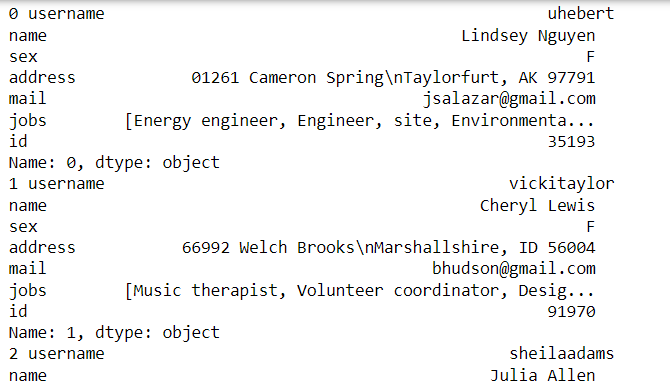

In [15]:
res_dct = {}

for index, row in df.iterrows():
    for job in row['jobs']:  # для каждого элемента словаря работ в строке
        if job in res_dct:  
            res_dct[job].append(row['username'])  # если такая работа уже есть в ключах словаря, то добавляем в список людей username 
        else:
            res_dct[job] = [row['username']]  # если такой работы нет, создаем новую пару ключ: значение

# печатаем результат в красивом формате
for key in res_dct:
    print(key, res_dct[key], sep=':\n', end='\n\n')

Energy engineer:
['uhebert', 'annmoore', 'garysilva', 'martinezashley', 'sextonsheila', 'pjames', 'smithjonathan', 'wardjames', 'cwheeler', 'ucarlson', 'robert71', 'johnsontheresa', 'amanda41', 'stacey47', 'timothynelson', 'timothynelson', 'rogersmichael', 'melissa94', 'wmcdaniel', 'charles74', 'smithjennifer', 'clintonjones']

Engineer, site:
['uhebert', 'nancy12', 'andrea03', 'catherineross', 'wesley32', 'natalieross', 'rossdoris', 'christophersmith', 'dbooker', 'ericarobertson', 'trantricia', 'tpugh', 'jasonvelez', 'samantha36', 'brandidaniels', 'tenglish', 'reyesbrett', 'austin18', 'vjohnson', 'zmejia', 'daniel04', 'cynthia20', 'morgan15', 'avaldez', 'jessica92', 'laurieholloway', 'baileyvictoria']

Environmental health practitioner:
['uhebert', 'jonathanchristian', 'xjohnson', 'dsmith', 'james01', 'nancytaylor', 'ztaylor', 'andrewwoods', 'susan54', 'fmaldonado', 'james74', 'bakerjacob', 'stephanie81', 'whitejoseph', 'qolson', 'hknox', 'gonzalesdaniel', 'tranronald', 'jessegreen', 

ИЛИ

In [16]:
with open('data\\contributors_sample.json', 'r', encoding='utf-8') as file: # открываем файл на чтение
    data_loaded = json.load(file)
    
    uniq_jobs = []
    for dct in data_loaded:  # для каждого data_loaded[i] словаря в списке
        jobs_lst =  dct.get('jobs')
        for job in jobs_lst:
            if job not in uniq_jobs:  
                uniq_jobs.append(job)  # получаем список уникальных работ
# создаем словарь учитывая, что у каждого user СПИСОК работ, а не одна соответствующая работа
res_dct = {user_job: [dct['username'] for dct in data_loaded if user_job in dct['jobs']] for user_job in uniq_jobs}

# печатаем результат в красивом формате
for key in res_dct:
    print(key, res_dct[key], sep=':\n', end='\n\n')

Energy engineer:
['uhebert', 'annmoore', 'garysilva', 'martinezashley', 'sextonsheila', 'pjames', 'smithjonathan', 'wardjames', 'cwheeler', 'ucarlson', 'robert71', 'johnsontheresa', 'amanda41', 'stacey47', 'timothynelson', 'rogersmichael', 'melissa94', 'wmcdaniel', 'charles74', 'smithjennifer', 'clintonjones']

Engineer, site:
['uhebert', 'nancy12', 'andrea03', 'catherineross', 'wesley32', 'natalieross', 'rossdoris', 'christophersmith', 'dbooker', 'ericarobertson', 'trantricia', 'tpugh', 'jasonvelez', 'samantha36', 'brandidaniels', 'tenglish', 'reyesbrett', 'austin18', 'vjohnson', 'zmejia', 'daniel04', 'cynthia20', 'morgan15', 'avaldez', 'jessica92', 'laurieholloway', 'baileyvictoria']

Environmental health practitioner:
['uhebert', 'jonathanchristian', 'xjohnson', 'dsmith', 'james01', 'nancytaylor', 'ztaylor', 'andrewwoods', 'susan54', 'fmaldonado', 'james74', 'bakerjacob', 'stephanie81', 'whitejoseph', 'qolson', 'hknox', 'gonzalesdaniel', 'tranronald', 'jessegreen', 'stephanie69', 'e

<span style='color:green'>2.2 Сохраните результаты в файл `job_people.pickle` и в файл `job_people.json` с использованием форматов pickle и JSON соответственно. Сравните объемы получившихся файлов. При сохранении в JSON укажите аргумент `indent`.</span>

In [17]:
import pickle

# сохранение в файл job_people.pickle
with open('job_people.pickle', 'wb') as f:
    pickle.dump(res_dct, f)

# сохранение в файл job_people.json с отступами (с indent)
with open('job_people.json', 'w') as f:
    json.dump(res_dct, f, indent=4)  # indent - отступы в начале строки (4 пробела) для читабельности

In [18]:
import os

# находим размер файлов
size_pickle = os.path.getsize('job_people.pickle')
size_json = os.path.getsize('job_people.json')

print(f'job_people.pickle: {size_pickle} байт')
print(f'job_people.json:   {size_json} байт')

job_people.pickle: 132053 байт
job_people.json:   406637 байт


<span style='color:green'>2.3 Считайте файл `job_people.pickle` и продемонстрируйте, что данные считались корректно.</span> 

In [19]:
with open('job_people.pickle', 'rb') as f:
    data = pickle.load(f)
    for key in data:
        print(key, data[key], sep=':\n', end='\n\n')

Energy engineer:
['uhebert', 'annmoore', 'garysilva', 'martinezashley', 'sextonsheila', 'pjames', 'smithjonathan', 'wardjames', 'cwheeler', 'ucarlson', 'robert71', 'johnsontheresa', 'amanda41', 'stacey47', 'timothynelson', 'rogersmichael', 'melissa94', 'wmcdaniel', 'charles74', 'smithjennifer', 'clintonjones']

Engineer, site:
['uhebert', 'nancy12', 'andrea03', 'catherineross', 'wesley32', 'natalieross', 'rossdoris', 'christophersmith', 'dbooker', 'ericarobertson', 'trantricia', 'tpugh', 'jasonvelez', 'samantha36', 'brandidaniels', 'tenglish', 'reyesbrett', 'austin18', 'vjohnson', 'zmejia', 'daniel04', 'cynthia20', 'morgan15', 'avaldez', 'jessica92', 'laurieholloway', 'baileyvictoria']

Environmental health practitioner:
['uhebert', 'jonathanchristian', 'xjohnson', 'dsmith', 'james01', 'nancytaylor', 'ztaylor', 'andrewwoods', 'susan54', 'fmaldonado', 'james74', 'bakerjacob', 'stephanie81', 'whitejoseph', 'qolson', 'hknox', 'gonzalesdaniel', 'tranronald', 'jessegreen', 'stephanie69', 'e

### XML

<span style='color:green'>3.1 По данным файла `steps_sample.xml` сформируйте словарь с шагами по каждому рецепту вида `{id_рецепта: ["шаг1", "шаг2"]}`. Сохраните этот словарь в файл `steps_sample.json`</span>

In [24]:
# import required modules
import requests
from bs4 import BeautifulSoup

# Выполняем парсинг XML файла:
with open('data\\steps_sample.xml') as file:
    soup = BeautifulSoup(file, 'xml')

In [25]:
# список для хранения словарей с именами и телефонами
recipe_steps_dict = {}

for recipe in soup.find_all('recipe'):
    steps = [step.text for step in recipe.find('steps') if step.text != '\n']
    recipe_id = recipe.find('id').text
    recipe_steps_dict[recipe_id] = steps
        
for key in recipe_steps_dict:
    print(key, recipe_steps_dict[key], sep=':\n', end='\n\n')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['remove mushroom stems and chop', 'in a medium skillet , saut mushroom stems , bell peppers , green onions , garlic and basil in butter until tender', 'cool and add cheese', 'add salt and pepper to taste', 'bake mushrooms , smooth side down , in a buttered dish for 15 minutes at 425', 'spoon filling into mushrooms and bake for 10 minutes more']

427719:
['wash & destem the mushrooms and place them stem side up on a plate', 'mash up the avocado and mix in the onions , tomato , and salt', 'spoon this into the mushroom caps', 'pour braggs lightly over each mushroom and around the plate so it soaks into the mushroom a bit', 'you can always add extras such as sprouts , more tomato , or olives', 'enjoy !']

381314:
['mix together the hot mashed potatoes , eggs , butter and 2 teaspoons of cornstarch', 'set aside and let cool', 'in a frying pan , heat the olive oil', 'add the ground beef and cook until no longer pink', 'stir to break up the meat', 'add the sofrito , tomato sauce , oregano and

<span style='color:green'>3.2 По данным файла `steps_sample.xml` сформируйте словарь следующего вида: `кол-во_шагов_в_рецепте: [список_id_рецептов]`</span>

In [21]:
# import required modules
import requests
from bs4 import BeautifulSoup

# Выполняем парсинг XML файла:
with open('data\\steps_sample.xml') as file:
    soup = BeautifulSoup(file, 'xml')

In [27]:
# список для хранения словарей с именами и телефонами
recipe_steps_dict = {}

for recipe in soup.find_all('recipe'):
    steps_count = len(recipe.find('steps'))
    recipe_id = recipe.find('id').text

    if steps_count in recipe_steps_dict:
        recipe_steps_dict[steps_count].append(recipe_id)
    else:
        recipe_steps_dict[steps_count] = [recipe_id]
        
for key in recipe_steps_dict:
    print(key, recipe_steps_dict[key], sep=':\n', end='\n\n')

23:
['44123', '302399', '375376', '140610', '374703', '111198', '257111', '432661', '114204', '63069', '165096', '33947', '250024', '330512', '315233', '25259', '331174', '407621', '263019', '112853', '383729', '13709', '336166', '143286', '387284', '290003', '370746', '34833', '11975', '426211', '373582', '88845', '456968', '14149', '507927', '73602', '91981', '175109', '390933', '193208', '83893', '243008', '259789', '303926', '410920', '446605', '32571', '74419', '308056', '78497', '111963', '361181', '302640', '356655', '53743', '57771', '420689', '74520', '50851', '176277', '266814', '27897', '189207', '138771', '279797', '177831', '32515', '256842', '95295', '383349', '109791', '332641', '116993', '173126', '187872', '177681', '249006', '314834', '283033', '117084', '49202', '284916', '247657', '313162', '424727', '227557', '431305', '263038', '439979', '443041', '241042', '258779', '66965', '200503', '109597', '503121', '290595', '401175', '169146', '282228', '316435', '248582',

<span style='color:green'>3.3 Получите список рецептов, в этапах выполнения которых есть информация о времени (часы или минуты). Для отбора подходящих рецептов обратите внимание на атрибуты соответствующих тэгов.</span>

In [7]:
recipes_with_time = []

for recipe in soup.find_all('recipe'):
    for step in recipe.find('steps').find_all('step'):
        # проверяем, есть ли информация о времени в атрибуте has_minutes
        if 'has_minutes' in step.attrs:
            recipes_with_time.append(recipe.find(id).text)  # добавляем в список id рецепта в которм найден шаг со временем
            break
            
print(recipes_with_time)

['44123', '35173', '453467', '306168', '50662', '118843', '149593', '200148', '310570', '95534', '109818', '66932', '226001', '141939', '250883', '120297', '223349', '60938', '302399', '342620', '296983', '129581', '325714', '487173', '447429', '137701', '63346', '342619', '383120', '463219', '39172', '173730', '287778', '437637', '123115', '371549', '376813', '390230', '401605', '306590', '299968', '192542', '147563', '193719', '38852', '250232', '437219', '21357', '198343', '129919', '375376', '63131', '24760', '375362', '217296', '435816', '198073', '202949', '367828', '140610', '392181', '468143', '176996', '290187', '459738', '111198', '33246', '302498', '165438', '267159', '401283', '428566', '533190', '478546', '40228', '255985', '402246', '180817', '133326', '513963', '213395', '482111', '292147', '449768', '257696', '53353', '115160', '140172', '392598', '356163', '140173', '289025', '291409', '282812', '489337', '250900', '245950', '388578', '360881', '101260', '256464', '122

<span style='color:green'>3.4 Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в таблицу `recipes`. Для строк, которые содержат пропуски в столбце `n_steps`, заполните этот столбец на основе файла  `steps_sample.xml`. Строки, в которых столбец `n_steps` заполнен, оставьте без изменений.</span>

In [30]:
import pandas as pd

# Загрузка данных из файла recipes_sample.csv
recipes = pd.read_csv('recipes_sample.csv')
print(recipes.head())

# Проверим строки с пропущенными значениями в столбце n_steps
missing_steps = recipes[recipes['n_steps'].isnull()]

                                       name     id  minutes  contributor_id  \
0     george s at the cove  black bean soup  44123       90           35193   
1        healthy for them  yogurt popsicles  67664       10           91970   
2              i can t believe it s spinach  38798       30            1533   
3                      italian  gut busters  35173       45           22724   
4  love is in the air  beef fondue   sauces  84797       25            4470   

    submitted  n_steps                                        description  \
0  2002-10-25      NaN  an original recipe created by chef scott meska...   
1  2003-07-26      NaN  my children and their friends ask for my homem...   
2  2002-08-29      NaN            these were so go, it surprised even me.   
3  2002-07-27      NaN  my sister-in-law made these for us at a family...   
4  2004-02-23      4.0  i think a fondue is a very romantic casual din...   

   n_ingredients  
0           18.0  
1            NaN  
2    

In [34]:
# Заполним пропущенные значения в столбце n_steps на основе словаря из 3.2
for index, row in missing_steps.iterrows():
    recipe_id = row['id']
    for steps, recipe_ids in recipe_steps_dict.items():
        if str(recipe_id) in recipe_ids:
            recipes.loc[recipes['id'] == recipe_id, 'n_steps'] = steps
            break

print(recipes.head())

                                       name     id  minutes  contributor_id  \
0     george s at the cove  black bean soup  44123       90           35193   
1        healthy for them  yogurt popsicles  67664       10           91970   
2              i can t believe it s spinach  38798       30            1533   
3                      italian  gut busters  35173       45           22724   
4  love is in the air  beef fondue   sauces  84797       25            4470   

    submitted  n_steps                                        description  \
0  2002-10-25     23.0  an original recipe created by chef scott meska...   
1  2003-07-26      7.0  my children and their friends ask for my homem...   
2  2002-08-29     11.0            these were so go, it surprised even me.   
3  2002-07-27     15.0  my sister-in-law made these for us at a family...   
4  2004-02-23      4.0  i think a fondue is a very romantic casual din...   

   n_ingredients  
0           18.0  
1            NaN  
2    

<span style='color:green'>3.5 Проверьте, содержит ли столбец `n_steps` пропуски. Если нет, то преобразуйте его к целочисленному типу и сохраните результаты в файл `recipes_sample_with_filled_nsteps.csv`</span>

In [35]:
if recipes['n_steps'].isnull().any():
    print("Столбец n_steps содержит пропуски.")
else:
    # Преобразуем столбец n_steps к целочисленному типу, если пропусков нет
    recipes['n_steps'] = recipes['n_steps'].astype(int)
    # Сохраним результаты в новый файл
    recipes.to_csv("recipes_sample_with_filled_nsteps.csv", index=False)  # do not Write row names (index).
    print("Столбец n_steps не содержит пропуски. \nРезультаты сохранены в файл recipes_sample_with_filled_nsteps.csv.")

Столбец n_steps не содержит пропуски. 
Результаты сохранены в файл recipes_sample_with_filled_nsteps.csv.
